# Aliasing
Just imagine - you recorded a high pitch sound on a digital recorder. But it sounds a very different low pitch when
you play it back - due to a particular glitch on your recorder. Such a phenomenon in signal processing is called
'aliasing'. Fortunately, consumers don't usually have to deal with that mess, because design engineers do what is
necessary to avoid aliasing. But there is no escape for engineers and DIYers - you have to deal with it. It's a
nuisance everyone is careful to avoid.

This notebook is a simplified description of aliasing. Though it sounds complicated, it is a surprisingly simple
phenomenon - a side effect of the magic of sine waves. Let's see what it means.

In [1]:
# We use python. This block just initializes some necessary dependencies

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('bmh')
matplotlib.rcParams['figure.figsize'] = [15.0, 10.0]

## Continuous signals and sampling
As you surely know, sound, electricity and many other types of signals in nature are made of waves like in Plot 1:

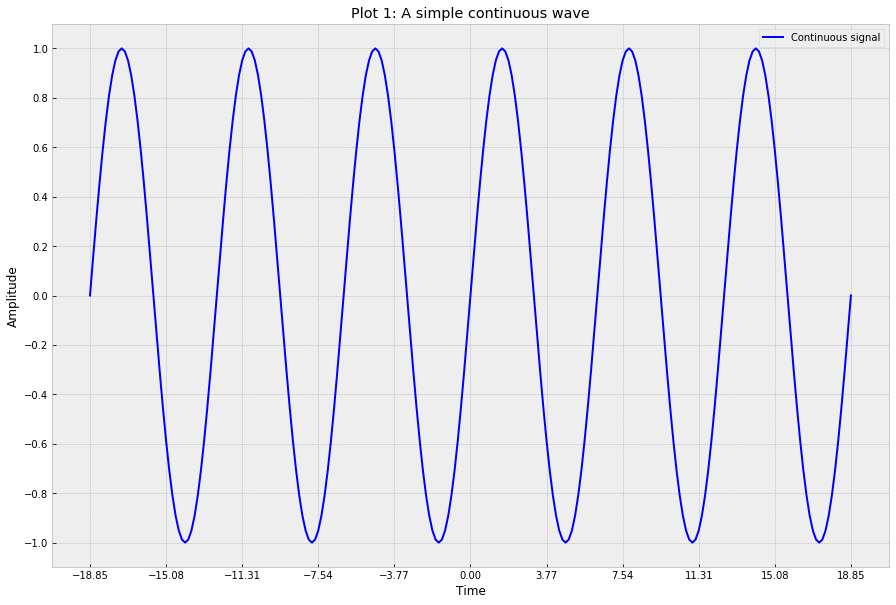

In [2]:
# This code block plots a continous wave. Skip if interested only in result

n = 240
t = np.linspace(-6 * np.pi, 6 * np.pi, n + 1)
y = np.sin(t)

def plotall(title, y1 = None, y2 = None, interval = None):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticks(np.linspace(t.min(), t.max(), 11))
    ax.set_yticks(np.linspace(y.min(), y.max(), 11))
    ax.set_title(title)
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')
    if y1 is not None:
        ax.plot(t, y1, 'b-', label = 'Continuous signal')
    if y2 is not None:
        ax.plot(t, y2, 'g-', label = 'Reconstructed signal')
    if interval is not None:
        s = np.arange(0, n, interval)
        td = t[s]
        yd = y[s]
        ax.stem(td, yd, linefmt='r--', markerfmt='ro', label = 'Sampled signal')
    ax.legend();

plotall('Plot 1: A simple continuous wave', y1 = y)

These types of signals are called *continuous signals* (also called *analog signals* - less appropriately).
They are continuous because they have no missing points in between. The value of the signal is defined
for any instant of time during the lifetime of the signal. Signals are continuous in nature and just after
converting them to electric signals (acquisition).

## Sampling

Digital devices and computers however, can't store or communicate signals in continuous form. They 'count'
and store numbers *discretely* in *memory cells*. The process of converting continuous signals to the
discrete form is called *sampling*. Sampling is illustrated in Plot 2 below:

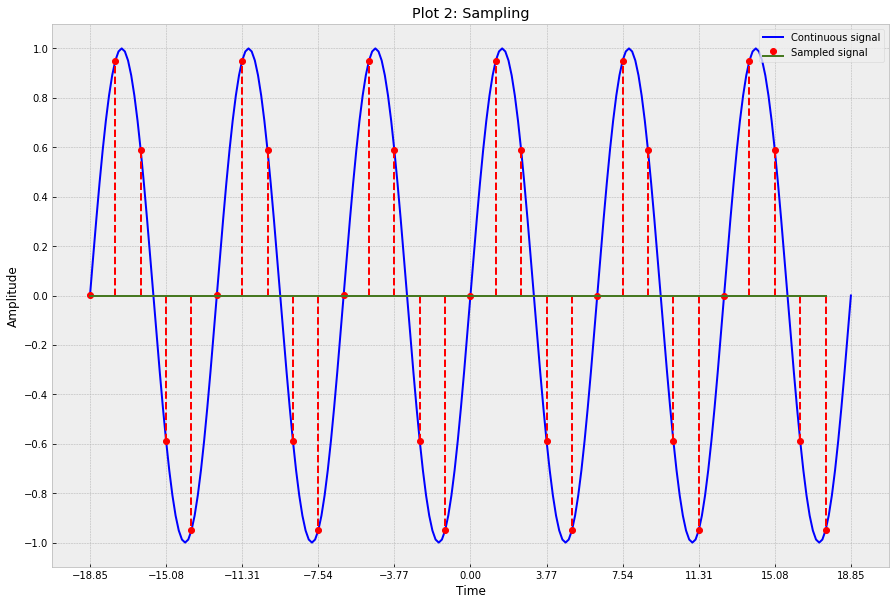

In [3]:
# This code block plots sampling. Skip if interested only in result

plotall('Plot 2: Sampling', y1 = y, interval = 8)

As you can see in Plot 2, the blue curve was the original signal. The red dots represent the samples that are
acquired, stored or transmitted digitally. The samples are taken from the continuous signal at regular time
intervals. The sampled signals have no meaning at time instants where the samples are not taken.

The time interval between two samples is called *sampling interval*, and the rate at which samples are acquired
is called *sampling frequency*. Sampling frequency is usually expressed in units of 'samples per second' or sps.
Computers usually record audio at 44 Ksps (44000 sps).

The original continuous signal can be recreated (like when you want to hear music from a player) from the samples
by simply connecting the dots (electronically). This process is called *reconstruction*, and is the reverse process
of sampling.

## Effect of changing sampling frequency
So, how should we set the sampling frequency for a source continuous signal? [Harry Nyquist](https://en.wikipedia.org/wiki/Harry_Nyquist)
defined that the sampling frequency should be atleast twice that of the maximum frequency found in the original
signal. If there are n cycles in the continuous signal, there should be atleast 2n samples. You will notice in
Plot 2 that there are more than twice as many samples as there are cycles in the continuous signal.

So, what if we don't meet that criterion? Let us try taking less than twice as many samples as there are cycles: 

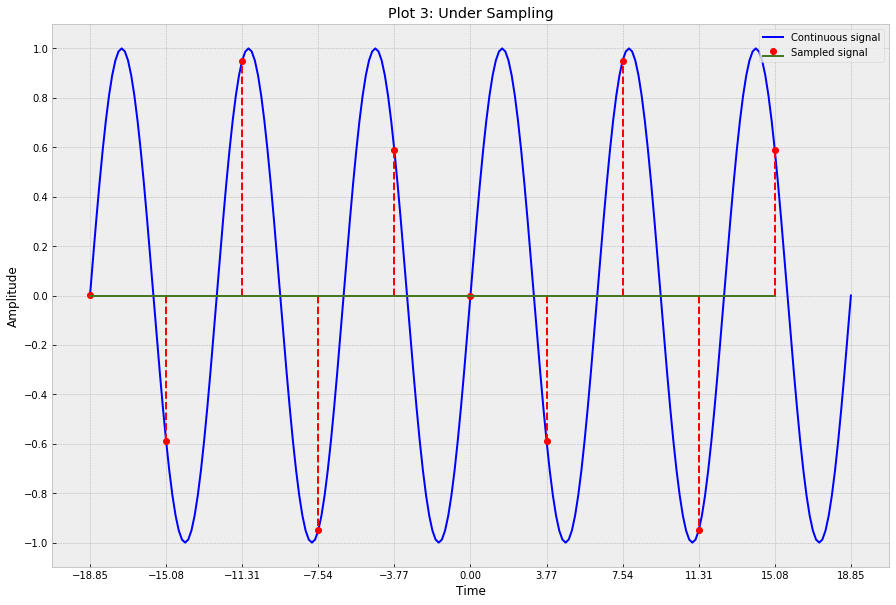

In [4]:
# This code block shows under-sampling. Skip if interested only in result

plotall('Plot 3: Under Sampling', y1 = y, interval = 24)

Let us see what these samples look like in isolation:

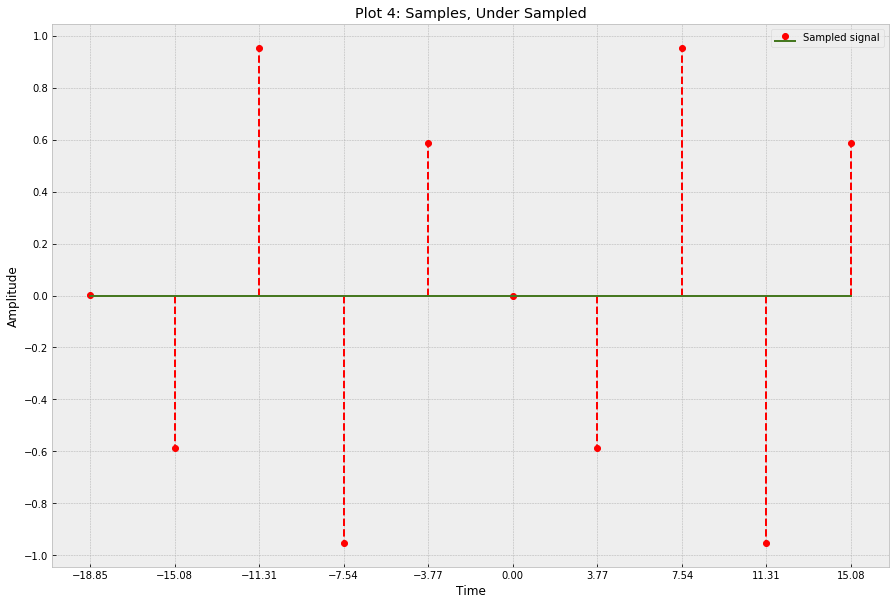

In [5]:
# This code block shows samples of under-sampling. Skip if interested only in result

plotall('Plot 4: Samples, Under Sampled', interval = 24)

Reconstructing the original signal from these samples require just connecting these red dots with a sine wave.
let's do that:

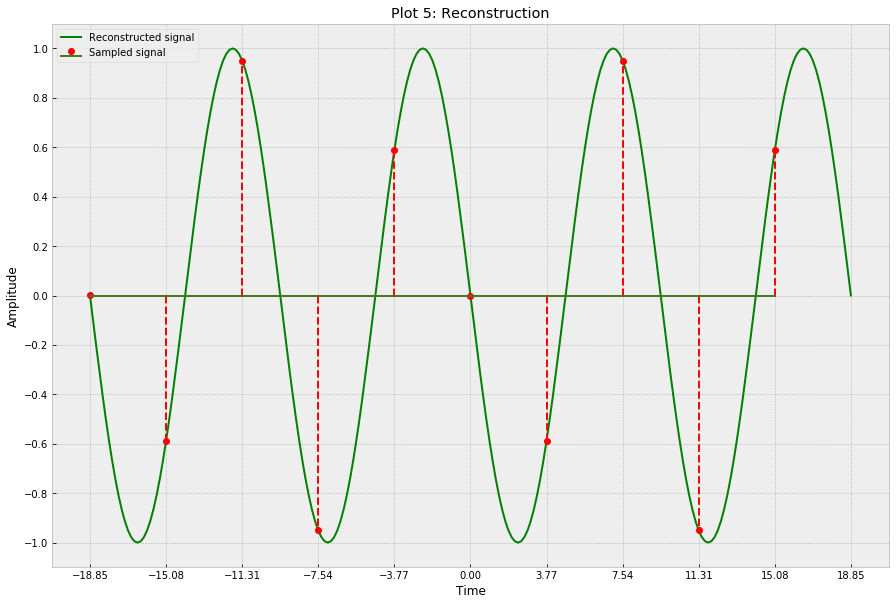

In [6]:
# This code block shows reconstruction. Skip if interested only in result

yb = -np.sin(t/1.5)
plotall('Plot 5: Reconstruction', y2 = yb, interval = 24)

In plot 5 above, we reconstructed the continuous signal from the samples. But is this signal the same as the
original signal in Plot 1? Let's plot both together and see:

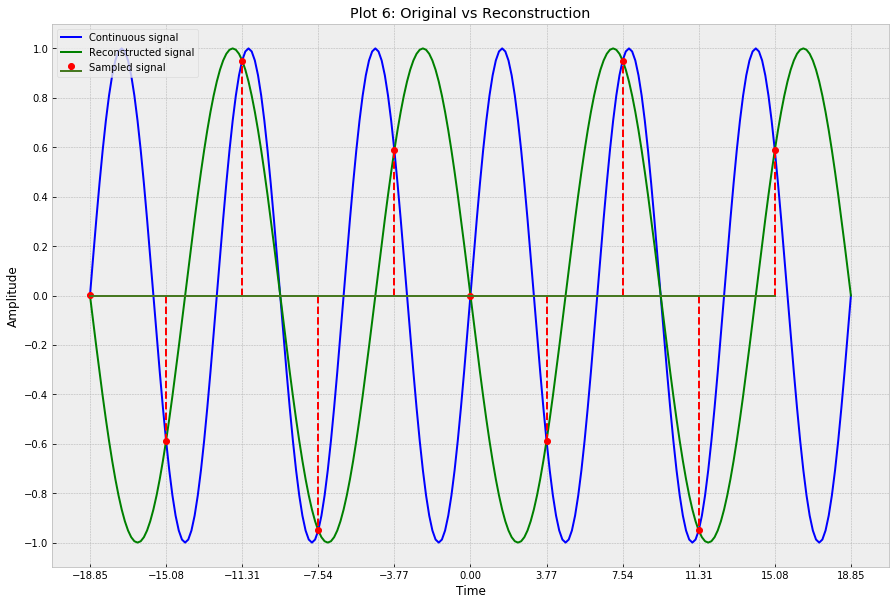

In [7]:
# This code block plots original signal, samples and reconstruction. Skip if interested only in result

plotall('Plot 6: Original vs Reconstruction', y1 = y, y2 = yb, interval = 24)

As you can see, there is a problem. Reconstructed signal (green) doesn't match the original signal (blue) at all.
They are of different frequencies. Yet, both signals pass through all the red sample points. So! There are two
signals that can be reconstructed from the samples. Which one will be chosen?

All reconstruction circuits are designed to choose the lower frequency signal. In this case, it is the green wave.
But that isn't the original blue signal. This problem is called **Aliasing**. You put in one frequency, you get
something else back! The only way to avoid this is to satisfy **Nyquist criterion** - choose sampling frequency
atleast twice the maximum frequency in the original continuous signal.

But what happens when you do meet Nyquist criterion? Will there still be two waves that can be reconstructed?
Yes! There will still be 2 waves that match the samples. However, the lower frequency wave will match original
wave. The wrong signal of higher frequency will be promptly rejected by the reconstruction circuit. Try it and
see for yourself!!

## Want to discuss this and more?
Head over to [MathLovers](https://matrix.to/#/#mathlovers:diasp.in) and share your ideas and questions with
like-minded maths enthusiasts.

## License
Copyright (c) 2017 Gokul Das B

*Software Code* in this code tree are under MIT license. *Documentation, media and graphs (including generated ones)*
in the code tree are under Creative Commons Attribution 4.0 license. You may use and distribute the contents subject
to the terms of these licenses. Refer to LICENSE.txt at the root of code tree for more details.